### Echo-RNN
The network remembers the input data and then echoes it after a few time-steps.  
This is part 3, building LSTM RNN using TensorFlow API : [Ref. blog](https://medium.com/@erikhallstrm/using-the-tensorflow-lstm-api-3-7-5f2b97ca6b73)  

#### import

In [1]:
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


#### network constant

In [2]:
num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length


#### data generation  
method to generate seq. data: random binary vector


In [3]:
def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    y = y.reshape((batch_size, -1))

    return (x, y)

### Building the Network Graph
#### Placeholders

In [4]:
batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

cell_state = tf.placeholder(tf.float32, [batch_size, state_size])
hidden_state = tf.placeholder(tf.float32, [batch_size, state_size])
init_state = tf.nn.rnn_cell.LSTMStateTuple(cell_state, hidden_state)

#### Variables
Weights and biases variabls are not required explicitly as TensorFlow RNN has internal wights and biases handling

In [5]:
#W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
#b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

#### Unpacking and split input seriess into batch

In [6]:
inputs_series = tf.split(batchX_placeholder, truncated_backprop_length, 1)
labels_series = tf.unstack(batchY_placeholder, axis=1)

#### Forward Pass

In [7]:
cell = tf.nn.rnn_cell.BasicLSTMCell(state_size, state_is_tuple=True)
states_series, current_state = tf.nn.static_rnn(cell, inputs_series, init_state)

#### Calculating loss
Softmax layer

In [8]:
logits_series = [tf.matmul(state, W2) + b2 for state in states_series] #Broadcasted addition
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels) for logits, labels in zip(logits_series,labels_series)]
total_loss = tf.reduce_mean(losses)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

#### Visualizing training

In [9]:
def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)

#### Run the network

Instructions for updating:
Use `tf.global_variables_initializer` instead.


New data, epoch 0
Step 0 Loss 0.693249
Step 100 Loss 0.621688
Step 200 Loss 0.55394
Step 300 Loss 0.306825
Step 400 Loss 0.0264668
Step 500 Loss 0.010701
Step 600 Loss 0.00585311
New data, epoch 1
Step 0 Loss 0.671387
Step 100 Loss 0.00495415
Step 200 Loss 0.00426261
Step 300 Loss 0.00278874
Step 400 Loss 0.00269565
Step 500 Loss 0.00215152
Step 600 Loss 0.00198911
New data, epoch 2
Step 0 Loss 1.13523
Step 100 Loss 0.00160977
Step 200 Loss 0.00187818
Step 300 Loss 0.00168476
Step 400 Loss 0.00157775
Step 500 Loss 0.00125713
Step 600 Loss 0.00129606
New data, epoch 3
Step 0 Loss 0.504714
Step 100 Loss 0.00117888
Step 200 Loss 0.000898455
Step 300 Loss 0.0011246
Step 400 Loss 0.000750796
Step 500 Loss 0.000813421
Step 600 Loss 0.000810736
New data, epoch 4
Step 0 Loss 0.809657
Step 100 Loss 0.000647291
Step 200 Loss 0.000642556
Step 300 Loss 0.000563785
Step 400 Loss 0.000579767
Step 500 Loss 0.000658098
Step 600 Loss 0.000564955
New data, epoch 5
Step 0 Loss 0.684166
Step 100 Loss 0.00

Step 100 Loss 0.000225353
Step 200 Loss 0.000238326
Step 300 Loss 0.000167689
Step 400 Loss 0.000167152
Step 500 Loss 0.00017058
Step 600 Loss 0.000155579
New data, epoch 43
Step 0 Loss 0.521071
Step 100 Loss 0.000152693
Step 200 Loss 0.000149307
Step 300 Loss 0.000136576
Step 400 Loss 0.000140105
Step 500 Loss 0.000163681
Step 600 Loss 0.000130654
New data, epoch 44
Step 0 Loss 0.429917
Step 100 Loss 0.000189616
Step 200 Loss 0.000177313
Step 300 Loss 0.0002248
Step 400 Loss 0.000147175
Step 500 Loss 0.000140694
Step 600 Loss 0.000142626
New data, epoch 45
Step 0 Loss 0.626277
Step 100 Loss 0.000188754
Step 200 Loss 0.000152411
Step 300 Loss 0.000157907
Step 400 Loss 0.000151456
Step 500 Loss 0.000123087
Step 600 Loss 0.000151247
New data, epoch 46
Step 0 Loss 0.773591
Step 100 Loss 0.000197341
Step 200 Loss 0.000163414
Step 300 Loss 0.000149593
Step 400 Loss 0.000146728
Step 500 Loss 0.000136968
Step 600 Loss 0.000147714
New data, epoch 47
Step 0 Loss 0.787501
Step 100 Loss 0.0001614

Step 100 Loss 0.000109618
Step 200 Loss 9.80777e-05
Step 300 Loss 7.77065e-05
Step 400 Loss 8.13818e-05
Step 500 Loss 9.72239e-05
Step 600 Loss 8.10628e-05
New data, epoch 85
Step 0 Loss 0.532851
Step 100 Loss 0.000107297
Step 200 Loss 8.98962e-05
Step 300 Loss 9.07976e-05
Step 400 Loss 9.06509e-05
Step 500 Loss 8.91368e-05
Step 600 Loss 9.33805e-05
New data, epoch 86
Step 0 Loss 0.492709
Step 100 Loss 9.53508e-05
Step 200 Loss 0.000105803
Step 300 Loss 8.44484e-05
Step 400 Loss 8.28319e-05
Step 500 Loss 8.66937e-05
Step 600 Loss 8.37351e-05
New data, epoch 87
Step 0 Loss 0.492745
Step 100 Loss 0.000132049
Step 200 Loss 0.00013571
Step 300 Loss 0.000103035
Step 400 Loss 9.59148e-05
Step 500 Loss 0.0001015
Step 600 Loss 0.000102137
New data, epoch 88
Step 0 Loss 0.442231
Step 100 Loss 9.97136e-05
Step 200 Loss 8.98029e-05
Step 300 Loss 8.2949e-05
Step 400 Loss 8.47878e-05
Step 500 Loss 7.51143e-05
Step 600 Loss 9.29304e-05
New data, epoch 89
Step 0 Loss 0.39782
Step 100 Loss 0.000106139

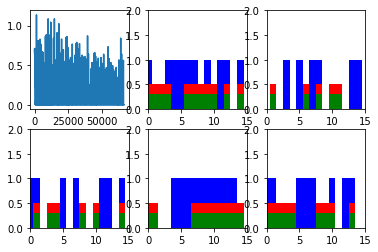

In [10]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_cell_state = np.zeros((batch_size, state_size))
        _current_hidden_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]
            
            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder: batchX,
                    batchY_placeholder: batchY,
                    cell_state: _current_cell_state,
                    hidden_state: _current_hidden_state
                })
            
            _current_cell_state, _current_hidden_state = _current_state

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
plt.show()